In [ ]:
! pip install opencv-python opencv-contrib-python scikit-learn numpy

You should consider upgrading via the 'D:\program files\python.exe -m pip install --upgrade pip' command.


In [13]:
! pip install pandas

   ---------------------------------------- 0.0/11.4 MB ? eta -:--:--
    --------------------------------------- 0.3/11.4 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.4 MB 1.4 MB/s eta 0:00:08
   -- ------------------------------------- 0.8/11.4 MB 1.4 MB/s eta 0:00:08
   --- ------------------------------------ 1.0/11.4 MB 1.3 MB/s eta 0:00:08
   ---- ----------------------------------- 1.3/11.4 MB 1.3 MB/s eta 0:00:08
   ----- ---------------------------------- 1.6/11.4 MB 1.3 MB/s eta 0:00:08
   ----- ---------------------------------- 1.6/11.4 MB 1.3 MB/s eta 0:00:08
   ------ --------------------------------- 1.8/11.4 MB 1.2 MB/s eta 0:00:09
   ------- -------------------------------- 2.1/11.4 MB 1.1 MB/s eta 0:00:09
   -------- ------------------------------- 2.4/11.4 MB 1.1 MB/s eta 0:00:09
   --------- ------------------------------ 2.6/11.4 MB 1.1 MB/s eta 0:00:08
   ---------- ----------------------------- 2.9/11.4 MB 1.2 MB/s eta 0:00:08
   ----------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
! pip install matplotlib

You should consider upgrading via the 'D:\program files\python.exe -m pip install --upgrade pip' command.


In [6]:
! pip install numpy

You should consider upgrading via the 'D:\program files\python.exe -m pip install --upgrade pip' command.


In [4]:
! pip install more-itertools

You should consider upgrading via the 'D:\program files\python.exe -m pip install --upgrade pip' command.


In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from skimage.feature import local_binary_pattern # Untuk visualisasi LBP

Total gambar ditemukan: 701
Total label numerik: 10
Mapping Label -> ID: {'S1': 0, 'S10': 1, 'S2': 2, 'S3': 3, 'S4': 4, 'S5': 5, 'S6': 6, 'S7': 7, 'S8': 8, 'S9': 9}

Menampilkan beberapa sampel gambar mentah dari dataset...


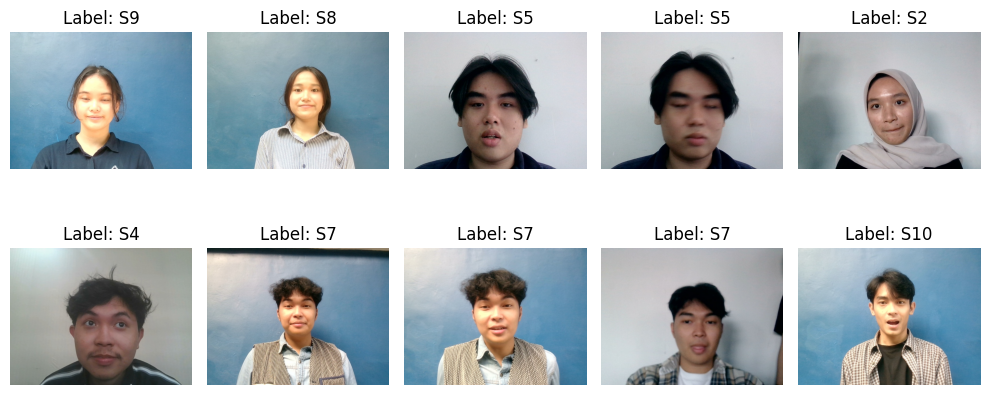

In [3]:
# --- Penjelasan ---
# Fungsi ini akan memuat path gambar dan labelnya dari struktur folder.
# Label diambil dari nama sub-folder (S1, S2, dst.).
def load_dataset_paths(dataset_path):
    image_paths = []
    labels = []
    label_dict = {}
    current_id = 0

    for subject_name in os.listdir(dataset_path):
        subject_path = os.path.join(dataset_path, subject_name)
        if os.path.isdir(subject_path):
            if subject_name not in label_dict:
                label_dict[subject_name] = current_id
                current_id += 1
            
            for image_name in os.listdir(subject_path):
                image_path = os.path.join(subject_path, image_name)
                image_paths.append(image_path)
                labels.append(label_dict[subject_name])
    
    return image_paths, labels, label_dict

# --- Eksekusi ---
dataset_path = "dataset6/" # Ganti dengan path dataset Anda
image_paths, numeric_labels, label_dict = load_dataset_paths(dataset_path)
id_to_label = {v: k for k, v in label_dict.items()} # Untuk mapping kembali ID ke nama

print(f"Total gambar ditemukan: {len(image_paths)}")
print(f"Total label numerik: {len(np.unique(numeric_labels))}")
print("Mapping Label -> ID:", label_dict)

# --- Visualisasi ---
print("\nMenampilkan beberapa sampel gambar mentah dari dataset...")
plt.figure(figsize=(10, 5))
for i in range(10): # Tampilkan 10 gambar acak
    idx = np.random.randint(0, len(image_paths))
    img = cv2.imread(image_paths[idx])
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Konversi untuk matplotlib
    
    plt.subplot(2, 5, i + 1)
    plt.imshow(img_rgb)
    plt.title(f"Label: {id_to_label[numeric_labels[idx]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

Memulai pre-processing semua gambar...

Pre-processing selesai. Total wajah berhasil diproses: 701
Menampilkan beberapa sampel wajah hasil pre-processing...


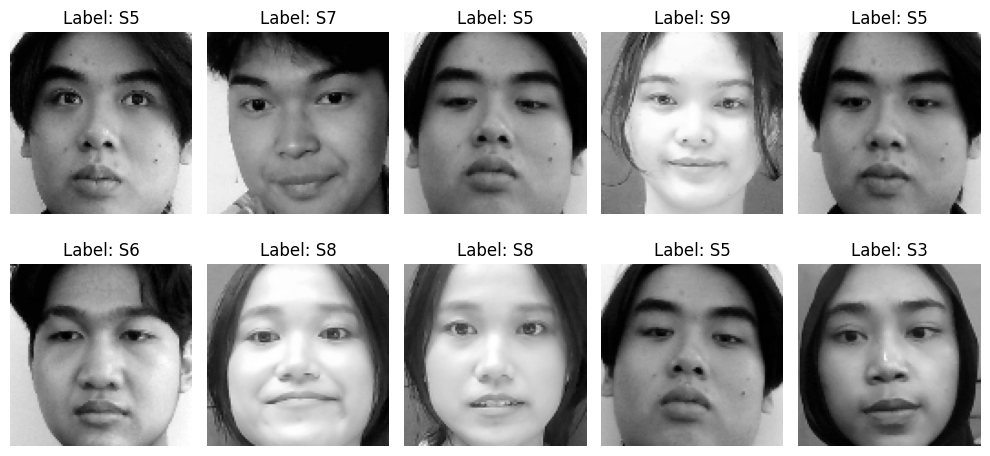

In [4]:
# --- Penjelasan ---
# Fungsi ini mengambil path gambar, mendeteksi wajah, meng-crop, 
# mengubah ke grayscale, dan me-resize ke ukuran standar.
def preprocess_images(paths):
    processed_faces = []
    corresponding_labels = []
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

    for i, path in enumerate(paths):
        img = cv2.imread(path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        faces_detected = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5)
        
        if len(faces_detected) > 0:
            (x, y, w, h) = faces_detected[0] # Ambil wajah pertama
            face_roi = gray[y:y+h, x:x+w]
            resized_face = cv2.resize(face_roi, (100, 100)) # Ukuran standar
            
            processed_faces.append(resized_face)
            corresponding_labels.append(numeric_labels[i])
        else:
            print(f"[Peringatan] Wajah tidak ditemukan di: {os.path.basename(path)}")
            
    return processed_faces, np.array(corresponding_labels)

# --- Eksekusi ---
print("Memulai pre-processing semua gambar...")
faces_data, labels_data = preprocess_images(image_paths)
print(f"\nPre-processing selesai. Total wajah berhasil diproses: {len(faces_data)}")

# --- Visualisasi Hasil Pre-processing ---
print("Menampilkan beberapa sampel wajah hasil pre-processing...")
plt.figure(figsize=(10, 5))
for i in range(10):
    idx = np.random.randint(0, len(faces_data))
    plt.subplot(2, 5, i + 1)
    plt.imshow(faces_data[idx], cmap='gray')
    plt.title(f"Label: {id_to_label[labels_data[idx]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [5]:
# --- Penjelasan & Parameter ---
#  menggunakan Local Binary Pattern (LBP) untuk mengekstrak fitur tekstur.
# Radius: Jarak piksel tetangga dari piksel tengah.
# n_points: Jumlah tetangga (biasanya 8).
# Method: 'uniform' adalah metode yang populer karena tahan rotasi dan mengurangi jumlah pola.
radius = 1
n_points = 8 * radius
method = 'uniform'

# --- Eksekusi & Simpan ke PDF ---
pdf_filename = "histograms_lbp.pdf"
print(f"Menghitung dan menyimpan histogram LBP ke file: {pdf_filename}...")

# Menggunakan PdfPages untuk menyimpan banyak plot dalam satu PDF
with PdfPages(pdf_filename) as pdf:
    # 1. Histogram Gabungan (Semua Subjek)
    all_histograms = []
    plt.figure(figsize=(10, 6))
    plt.title("Histogram LBP Gabungan (Semua Subjek)")
    plt.xlabel("Pola LBP (Bins)")
    plt.ylabel("Frekuensi")
    
    for face in faces_data:
        lbp = local_binary_pattern(face, n_points, radius, method)
        # Hitung histogram, n_points + 2 adalah jumlah bin untuk metode 'uniform'
        (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
        all_histograms.append(hist)
        plt.plot(hist, alpha=0.1, color='blue') # Plot tiap histogram tipis-tipis
    
    # Hitung dan plot rata-rata histogram
    mean_hist = np.mean(all_histograms, axis=0)
    plt.plot(mean_hist, color='red', linewidth=2, label='Rata-rata Histogram')
    plt.legend()
    pdf.savefig() # Simpan plot gabungan ke PDF
    plt.close()

    # 2. Histogram Per Subjek
    for subject_id, subject_name in id_to_label.items():
        subject_faces = [faces_data[i] for i, label in enumerate(labels_data) if label == subject_id]
        if not subject_faces:
            continue
            
        plt.figure(figsize=(10, 6))
        plt.title(f"Histogram LBP untuk Subjek: {subject_name}")
        plt.xlabel("Pola LBP (Bins)")
        plt.ylabel("Frekuensi")
        
        subject_hists = []
        for face in subject_faces:
            lbp = local_binary_pattern(face, n_points, radius, method)
            (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
            subject_hists.append(hist)
            plt.plot(hist, color='gray', alpha=0.3)
        
        mean_subject_hist = np.mean(subject_hists, axis=0)
        plt.plot(mean_subject_hist, color='green', linewidth=2, label=f'Rata-rata untuk {subject_name}')
        plt.legend()
        pdf.savefig() # Simpan plot subjek ini ke PDF
        plt.close()

print("File PDF berhasil dibuat.")

Menghitung dan menyimpan histogram LBP ke file: histograms_lbp.pdf...
File PDF berhasil dibuat.


In [7]:
# --- Penjelasan ---
# Membuat instance LBPH recognizer dengan parameter yang sama seperti di atas.
# Kemudian melatihnya menggunakan data wajah dan label numerik.
# Terakhir, menyimpan "pengetahuan" model ke sebuah file.

# --- Eksekusi ---
print("Memulai training model LBPH...")
# Parameter harus sesuai dengan yang digunakan untuk analisis histogram
lbph_recognizer = cv2.face.LBPHFaceRecognizer_create(radius=1, neighbors=8, grid_x=8, grid_y=8)

# Latih model
lbph_recognizer.train(faces_data, labels_data)

# Simpan model
output_model_file = "fmodel_lbph_final.yml"
lbph_recognizer.write(output_model_file)

print(f"Training selesai. Model disimpan di: {output_model_file}")

Memulai training model LBPH...
Training selesai. Model disimpan di: fmodel_lbph_final.yml


--- TAHAP 1: TRAINING MODEL ---
Memuat data training dari: dataset6/
Data training berhasil dimuat. Total 701 wajah dari 10 subjek.
Memulai training model LBPH...
Training selesai. Model disimpan di: fmodel_lbph_final.yml

--- TAHAP 2: EVALUASI MODEL ---
Memuat data testing dari: test3/
Data testing berhasil dimuat. Total 299 wajah akan dievaluasi.

Memulai pengujian dengan threshold = 95...

--- HASIL EVALUASI ---

== Classification Report ==

              precision    recall  f1-score   support

          S1       0.97      0.97      0.97        30
         S10       1.00      1.00      1.00        30
          S2       1.00      1.00      1.00        30
          S3       0.97      0.97      0.97        30
          S4       1.00      1.00      1.00        30
          S5       0.97      0.97      0.97        30
          S6       0.97      0.97      0.97        30
          S7       1.00      1.00      1.00        30
          S8       1.00      1.00      1.00        30
          

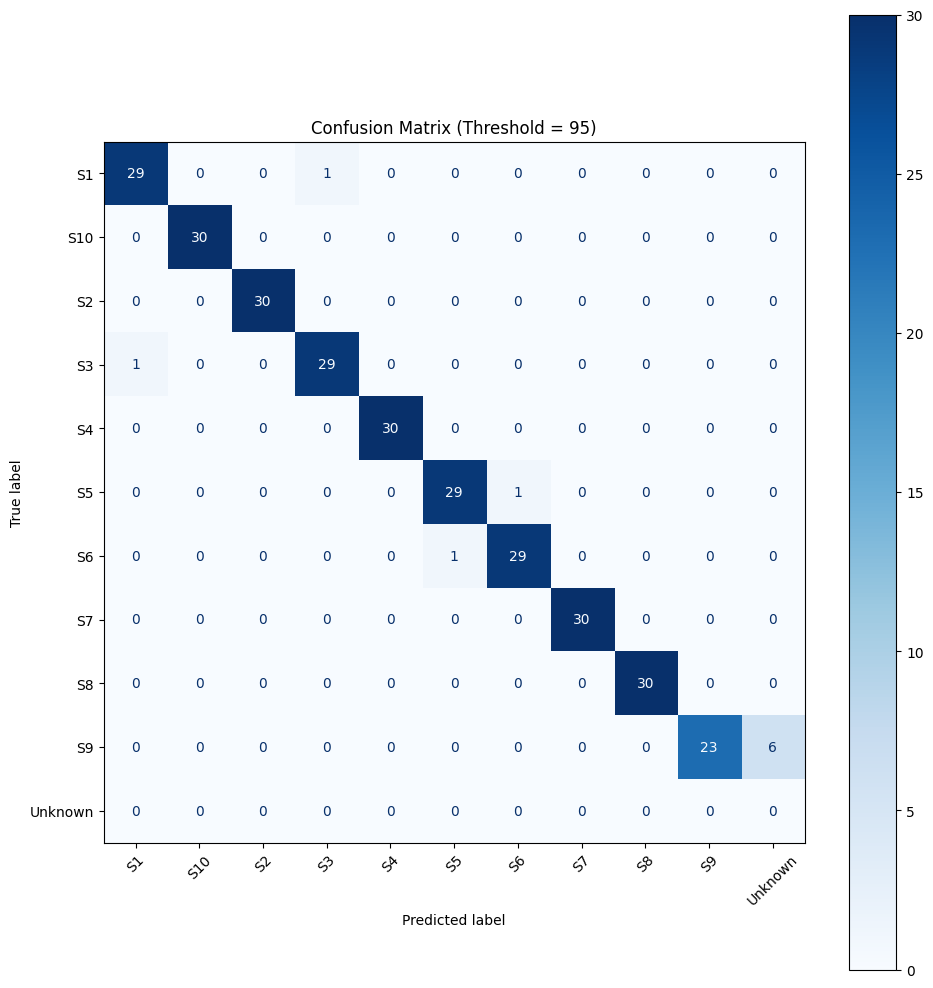


Skrip selesai.


In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# =============================================================================
# KONFIGURASI (Ubah bagian ini sesuai kebutuhan)
# =============================================================================
TRAINING_DATA_PATH = "dataset6/"
TESTING_DATA_PATH = "test3/"
CASCADE_PATH = "haarcascade_frontalface_default.xml"
OUTPUT_MODEL_FILE = "fmodel_lbph_final.yml"

# Threshold untuk evaluasi (semakin rendah = semakin ketat)
EVALUATION_THRESHOLD = 95

# =============================================================================
# FUNGSI BANTUAN (Helper Function)
# =============================================================================

def load_and_preprocess_data(dataset_path, face_cascade):
    """
    Fungsi untuk memuat dataset dari path, mendeteksi wajah,
    melakukan pre-processing (grayscale, resize), dan mengembalikan
    data wajah beserta label numeriknya.
    """
    image_paths = []
    numeric_labels = []
    label_dict = {}
    current_id = 0

    # Menggunakan sorted() untuk memastikan urutan label konsisten
    for subject_name in sorted(os.listdir(dataset_path)):
        subject_path = os.path.join(dataset_path, subject_name)
        if os.path.isdir(subject_path):
            if subject_name not in label_dict:
                label_dict[subject_name] = current_id
                current_id += 1
            
            for image_name in os.listdir(subject_path):
                image_path = os.path.join(subject_path, image_name)
                image_paths.append(image_path)
                numeric_labels.append(label_dict[subject_name])

    processed_faces = []
    corresponding_labels = []

    for i, path in enumerate(image_paths):
        img = cv2.imread(path)
        if img is None:
            continue
        
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces_detected = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5)
        
        if len(faces_detected) > 0:
            (x, y, w, h) = faces_detected[0]
            face_roi = gray[y:y+h, x:x+w]
            resized_face = cv2.resize(face_roi, (100, 100))
            processed_faces.append(resized_face)
            corresponding_labels.append(numeric_labels[i])

    id_to_label_map = {v: k for k, v in label_dict.items()}
    return processed_faces, np.array(corresponding_labels), id_to_label_map

# =============================================================================
# --- TAHAP 1: TRAINING MODEL ---
# =============================================================================
print("--- TAHAP 1: TRAINING MODEL ---")

# Inisialisasi detektor wajah
face_cascade = cv2.CascadeClassifier(CASCADE_PATH)

# Memuat dan memproses data training
print(f"Memuat data training dari: {TRAINING_DATA_PATH}")
training_faces, training_labels, id_to_label = load_and_preprocess_data(TRAINING_DATA_PATH, face_cascade)

if len(training_faces) == 0:
    print("Gagal memuat data training. Pastikan path dan struktur folder sudah benar.")
else:
    print(f"Data training berhasil dimuat. Total {len(training_faces)} wajah dari {len(np.unique(training_labels))} subjek.")
    
    # Membuat dan melatih model LBPH
    print("Memulai training model LBPH...")
    lbph_recognizer = cv2.face.LBPHFaceRecognizer_create(radius=1, neighbors=8, grid_x=8, grid_y=8)
    lbph_recognizer.train(training_faces, training_labels)
    
    # Menyimpan model
    lbph_recognizer.write(OUTPUT_MODEL_FILE)
    print(f"Training selesai. Model disimpan di: {OUTPUT_MODEL_FILE}\n")


# =============================================================================
# --- TAHAP 2: EVALUASI MODEL ---
# =============================================================================
print("--- TAHAP 2: EVALUASI MODEL ---")

# Memuat dan memproses data testing
print(f"Memuat data testing dari: {TESTING_DATA_PATH}")
testing_faces, testing_labels, _ = load_and_preprocess_data(TESTING_DATA_PATH, face_cascade)

if len(testing_faces) == 0:
    print("Gagal memuat data testing. Pastikan path dan struktur folder sudah benar.")
else:
    print(f"Data testing berhasil dimuat. Total {len(testing_faces)} wajah akan dievaluasi.")
    
    # Memuat model yang sudah dilatih
    recognizer = cv2.face.LBPHFaceRecognizer_create()
    recognizer.read(OUTPUT_MODEL_FILE)

    # Melakukan prediksi dan evaluasi
    y_true = []
    y_pred = []

    print(f"\nMemulai pengujian dengan threshold = {EVALUATION_THRESHOLD}...")
    for i, face in enumerate(testing_faces):
        actual_label_name = id_to_label[testing_labels[i]]
        y_true.append(actual_label_name)
        
        predicted_id, distance = recognizer.predict(face)
        
        if distance < EVALUATION_THRESHOLD:
            predicted_label_name = id_to_label.get(predicted_id, "Error ID")
        else:
            predicted_label_name = "Unknown"
            
        y_pred.append(predicted_label_name)

    # --- Menampilkan Hasil Evaluasi ---
    print("\n--- HASIL EVALUASI ---")
    
    all_possible_labels = sorted(list(id_to_label.values()))
    if "Unknown" not in all_possible_labels:
        all_possible_labels.append("Unknown")

    # 1. Classification Report
    print("\n== Classification Report ==\n")
    print(classification_report(y_true, y_pred, labels=all_possible_labels, zero_division=0))

    # 2. Confusion Matrix
    print("\n== Confusion Matrix ==\n")
    cm = confusion_matrix(y_true, y_pred, labels=all_possible_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=all_possible_labels)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    disp.plot(ax=ax, xticks_rotation=45, cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix (Threshold = {EVALUATION_THRESHOLD})")
    plt.tight_layout()
    plt.show()

print("\nSkrip selesai.")

CEK secara detil

In [20]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern

def hitung_lbp_uniform(path_gambar, nama_file_output):
    """
    Fungsi untuk menghitung nilai desimal LBP UNIFORM dari sebuah gambar
    dan menyimpannya ke file teks HANYA DALAM BENTUK ANGKA.

    Args:
        path_gambar (str): Lokasi file gambar input.
        nama_file_output (str): Nama file .txt untuk menyimpan hasil.
    """
    print(f"Membaca gambar dari: {path_gambar}")
    
    gambar = cv2.imread(path_gambar, cv2.IMREAD_GRAYSCALE)

    if gambar is None:
        print(f"Error: Gambar tidak ditemukan di path '{path_gambar}'")
        return

    print("Gambar berhasil dibaca. Memulai proses kalkulasi LBP Uniform...")

    P = 8
    R = 1

    # ==================================================================
    # PERUBAHAN UTAMA DI SINI
    # Mengubah metode dari 'default' menjadi 'uniform'
    # ==================================================================
    lbp = local_binary_pattern(gambar, P, R, method="uniform")
    
    print(f"Kalkulasi LBP Uniform selesai. Menyimpan hasil ke '{nama_file_output}'...")

    try:
        with open(nama_file_output, 'w') as f:
            for i in range(lbp.shape[0]):
                for j in range(lbp.shape[1]):
                    nilai_lbp = lbp[i, j]
                    f.write(f"{int(nilai_lbp)}\n")
                    
        print(f"Sukses! Hasil telah disimpan di file '{nama_file_output}' dengan format sederhana.")

    except Exception as e:
        print(f"Terjadi error saat menulis file: {e}")

# --- Bagian Utama untuk Menjalankan Kode ---
if __name__ == "__main__":
    # Ganti dengan path gambar asli (bukan gambar LBP)
    path_input_gambar = 'dataset6\S9\S9_0041.jpg' 

    # Nama file output yang akan dihasilkan
    nama_output = 'nilai_desimal_lbp_uniform.txt'

    # Panggil fungsi utama
    hitung_lbp_uniform(path_input_gambar, nama_output)

Membaca gambar dari: dataset6\S9\S9_0041.jpg
Gambar berhasil dibaca. Memulai proses kalkulasi LBP Uniform...
Kalkulasi LBP Uniform selesai. Menyimpan hasil ke 'nilai_desimal_lbp_uniform.txt'...
Sukses! Hasil telah disimpan di file 'nilai_desimal_lbp_uniform.txt' dengan format sederhana.


Membaca data dari file: nilai_desimal_lbp_uniform.txt...
Data berhasil diubah menjadi format gambar 2D.
Grafik grayscale berhasil dibuat dan disimpan sebagai: peta_tekstur_grayscale.png


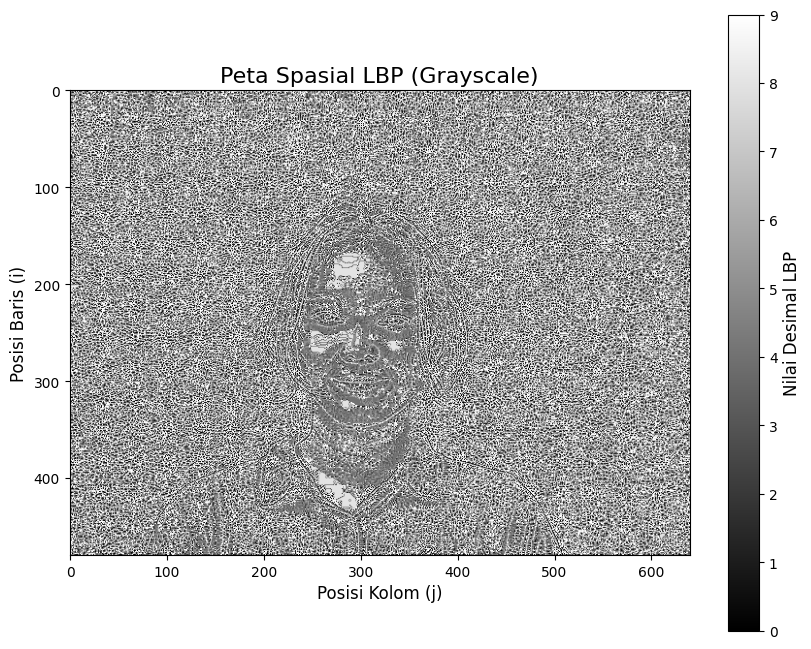

In [21]:
# Impor library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Pengaturan ---
# Nama file input Anda
nama_file_input = 'nilai_desimal_lbp_uniform.txt'
# Nama file output yang akan dihasilkan
nama_file_output = 'peta_tekstur_grayscale.png'
# Dimensi gambar
lebar_gambar = 640
tinggi_gambar = 480

# --- Logika Utama ---
try:
    # 1. Membaca data dari file .txt
    print(f"Membaca data dari file: {nama_file_input}...")
    data = pd.read_csv(nama_file_input, header=None, names=['nilai_lbp'])
    nilai_lbp_1d = data['nilai_lbp'].to_numpy()

    # 2. Memastikan jumlah data sesuai dengan dimensi gambar
    if nilai_lbp_1d.size != tinggi_gambar * lebar_gambar:
        print("Error: Jumlah data di file tidak sesuai dengan dimensi gambar (tinggi x lebar).")
    else:
        # 3. Mengubah array 1D menjadi array 2D (gambar)
        peta_lbp_2d = nilai_lbp_1d.reshape((tinggi_gambar, lebar_gambar))
        print("Data berhasil diubah menjadi format gambar 2D.")

        # 4. Membuat plot atau visualisasi
        plt.figure(figsize=(10, 8))

        # ==================================================================
        # PERUBAHAN UTAMA DI SINI: cmap diubah menjadi 'gray'
        # Nilai LBP yang lebih rendah (misal 0) akan lebih gelap (hitam)
        # Nilai LBP yang lebih tinggi (misal 9) akan lebih terang (putih)
        # ==================================================================
        gambar = plt.imshow(peta_lbp_2d, cmap='gray', vmin=0, vmax=9)

        # 5. Menambahkan detail pada grafik
        plt.title('Peta Spasial LBP (Grayscale)', fontsize=16)
        plt.xlabel('Posisi Kolom (j)', fontsize=12)
        plt.ylabel('Posisi Baris (i)', fontsize=12)

        # Menambahkan colorbar sebagai legenda skala abu-abu
        colorbar = plt.colorbar(gambar)
        colorbar.set_label('Nilai Desimal LBP', fontsize=12)

        # 6. Menyimpan gambar ke dalam file PNG
        plt.savefig(nama_file_output, dpi=300)
        print(f"Grafik grayscale berhasil dibuat dan disimpan sebagai: {nama_file_output}")

except FileNotFoundError:
    print(f"Error: File '{nama_file_input}' tidak ditemukan.")
except Exception as e:
    print(f"Terjadi sebuah error: {e}")

Grafik perbandingan berhasil disimpan sebagai 'perbandingan_histogram_skimage.png'


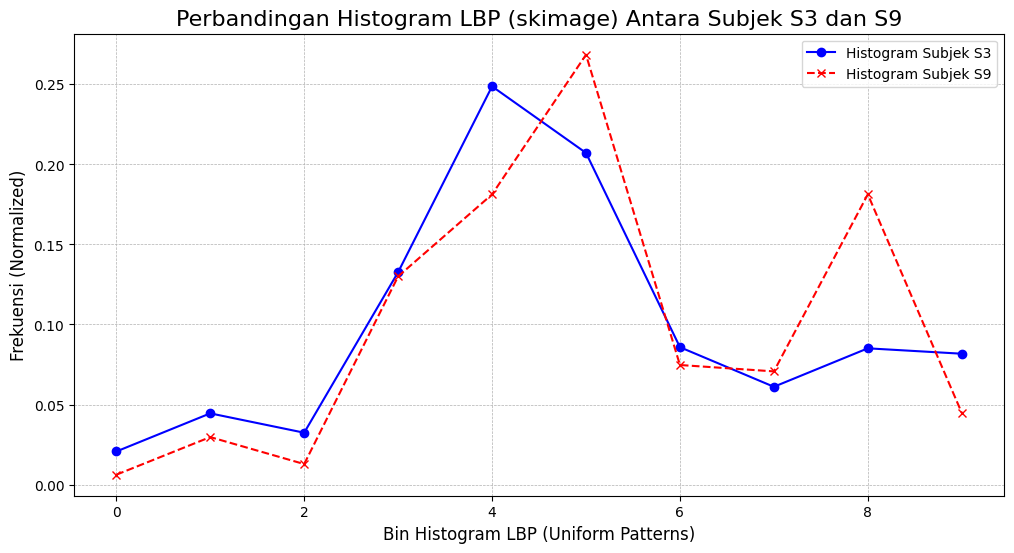

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern

def calculate_lbp_with_skimage(image_path, face_cascade):
    """
    Fungsi untuk membaca gambar, mendeteksi wajah, dan menghitung
    histogram LBP menggunakan scikit-image.
    """
    # Baca gambar dalam mode grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error: Gambar tidak ditemukan di {image_path}")
        return None

    # Deteksi wajah di dalam gambar
    faces = face_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    if len(faces) == 0:
        print(f"Peringatan: Tidak ada wajah terdeteksi di {image_path}, menggunakan seluruh gambar.")
        face_roi = img
    else:
        # Ambil area wajah pertama yang terdeteksi
        (x, y, w, h) = faces[0]
        face_roi = img[y:y+h, x:x+w]

    # --- Bagian Inti LBP dengan Scikit-Image ---
    # Parameter LBP: 8 titik tetangga, radius 1
    radius = 1
    n_points = 8 * radius
    
    # Hitung LBP image. Method 'uniform' menghasilkan histogram yang lebih kecil dan robust.
    lbp_image = local_binary_pattern(face_roi, n_points, radius, method='uniform')
    
    # Buat histogram dari LBP image
    # Jumlah bin untuk 'uniform' adalah n_points + 2
    bins = n_points + 2
    hist, _ = np.histogram(lbp_image.ravel(), bins=np.arange(0, bins + 1), density=True)

    return hist

# --- GANTI BAGIAN INI SESUAI DENGAN DATASET ANDA ---
path_subjek1 = r'test3\S3\S3_0005.jpg'
path_subjek2 = r'test3\S9\S9_0003.jpg'
# --- AKHIR BAGIAN YANG PERLU DIGANTI ---

# Inisialisasi detektor wajah (HANYA SEKALI) untuk efisiensi
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Hitung histogram untuk masing-masing subjek
hist_subjek1 = calculate_lbp_with_skimage(path_subjek1, face_cascade)
hist_subjek2 = calculate_lbp_with_skimage(path_subjek2, face_cascade)

# Pastikan kedua histogram berhasil dibuat sebelum plotting
if hist_subjek1 is not None and hist_subjek2 is not None:
    plt.figure(figsize=(12, 6))
    
    plt.plot(hist_subjek1, color='blue', marker='o', linestyle='-', label='Histogram Subjek S3')
    plt.plot(hist_subjek2, color='red', marker='x', linestyle='--', label='Histogram Subjek S9')
    
    plt.title('Perbandingan Histogram LBP (skimage) Antara Subjek S3 dan S9', fontsize=16)
    plt.xlabel('Bin Histogram LBP (Uniform Patterns)', fontsize=12)
    plt.ylabel('Frekuensi (Normalized)', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', linewidth=0.5)
    
    output_filename = 'perbandingan_histogram_skimage.png'
    plt.savefig(output_filename)
    print(f"Grafik perbandingan berhasil disimpan sebagai '{output_filename}'")
    
    plt.show()